In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import Dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Exploratory Data Analysis

In [4]:
df.shape

(200, 5)

In [5]:
#Changing the name of some columns
df = df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'})
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
#Looking for null values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [7]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null object
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID        200 non-null int64
Gender            200 non-null int64
Age               200 non-null int64
Annual_Income     200 non-null int64
Spending_Score    200 non-null int64
dtypes: int64(5)
memory usage: 7.9 KB


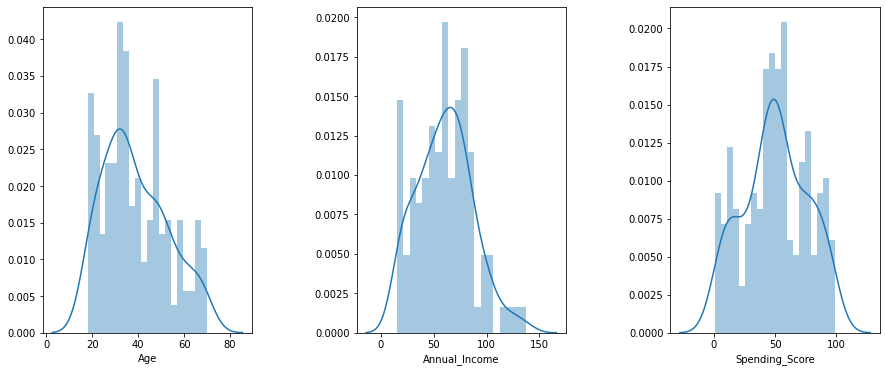

In [12]:
#DATA VISUALIZATION
#Density estimation of values using distplot
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_Income', "Spending_Score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos) #n_rows=1, n_cols=3, pos=1: starts from 1 from left and increse to right
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5) #space between subplots
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

0    112
1     88
Name: Gender, dtype: int64

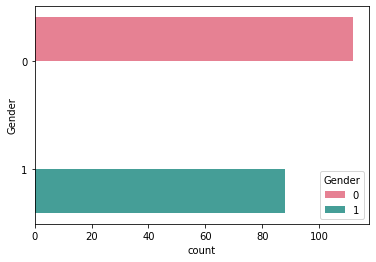

In [13]:
#Count and plot gender
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

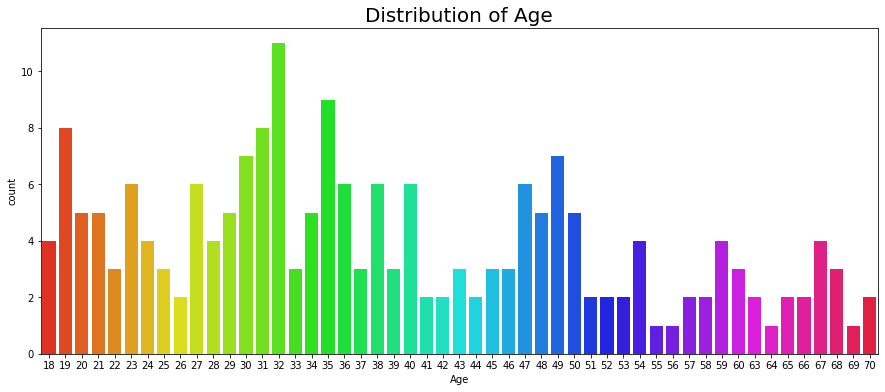

In [14]:
plt.figure(1 , figsize = (15 , 6)) #figsize: width, height in inches. 
#If not provided, defaults to rcParams["figure.figsize"] = [6.4, 4.8] = [6.4, 4.8].
sns.countplot(df['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

In [15]:
#This Graph shows a more Interactive Chart about the distribution of each Age Group 
#in the Mall for more clariy about the Visitor's Age Group in the Mall.
#By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent 
#but there is no clear pattern, we can only find some group wise patterns such as the the older 
#age groups are lesser frequent in comparison. Interesting Fact, 
#There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are 
#very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.


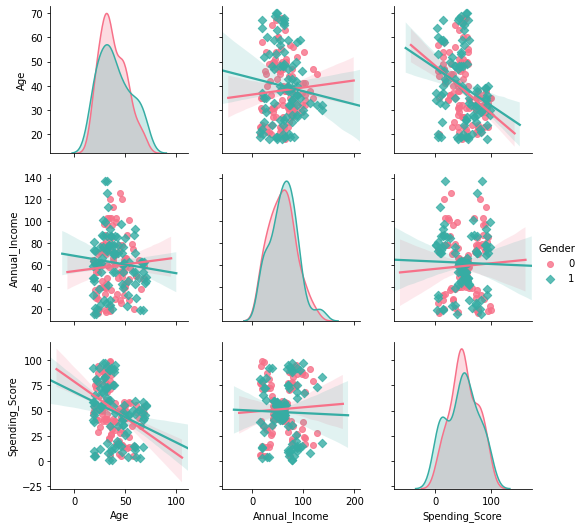

In [16]:
#Pairplot with variables 
sns.pairplot(df, vars=["Age", "Annual_Income", "Spending_Score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

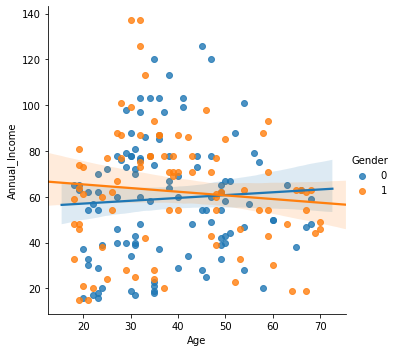

In [18]:
sns.lmplot(x = "Age", y = "Annual_Income", data = df, hue = "Gender")

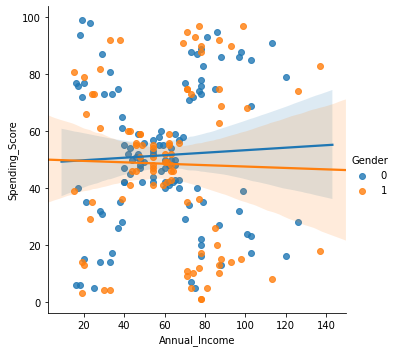

In [20]:
sns.lmplot(x="Annual_Income",y="Spending_Score",data=df,hue='Gender')

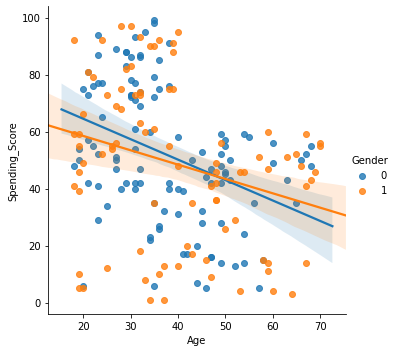

In [21]:
sns.lmplot(x="Age",y="Spending_Score",data=df,hue='Gender')

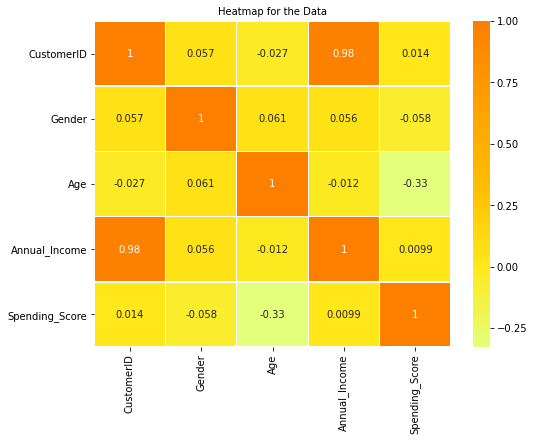

In [28]:
#Heatmap
plt.figure(1 , figsize = (8 , 6)) #figsize: width, height in inches.
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True,linewidth=0.4)
plt.title('Heatmap for the Data', fontsize = 10)
plt.show()

In [ ]:
X=df.loc[:,["Age","Spending_Score","Annual_Income"]]
X

In [ ]:
k=range(1,20)
k

In [ ]:
from sklearn.cluster import KMeans
inertia=[]
for i in k:
    k_means=KMeans(n_clusters=i,random_state=0)
    k_means.fit(X)
    inertia.append(k_means.inertia_)
    

In [ ]:
plt.plot(k,inertia,"bo--")
plt.xlabel('Number of Cluster')
plt.ylabel('inertia')
plt.show()

In [ ]:
k_means=KMeans(n_clusters=5,random_state=0)
k_means.fit(X)

In [ ]:
labels=k_means.labels_
centroids=k_means.cluster_centers_

In [ ]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= X['Spending_Score'],
    y= X['Annual_Income'],
    z= X['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 7,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_Score'),
            yaxis = dict(title  = 'Annual_Income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)